<strong>Question 2:</strong> A recent paper used microwave spectroscopy to identify the shape and non-bonding interactions of the formic acid-difluoromethane complex.
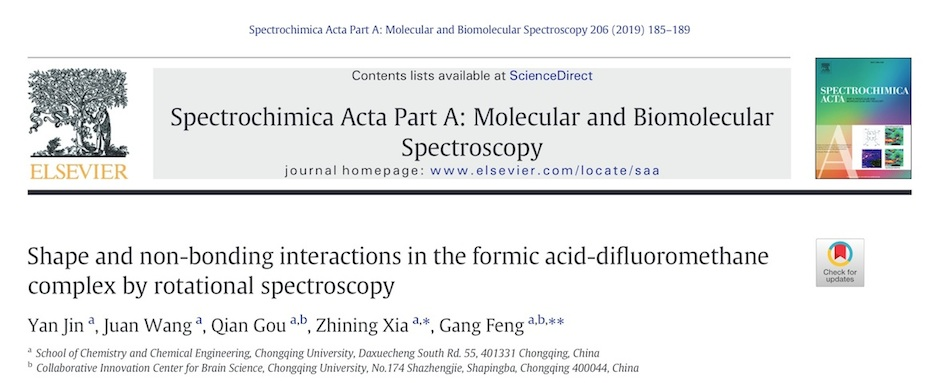
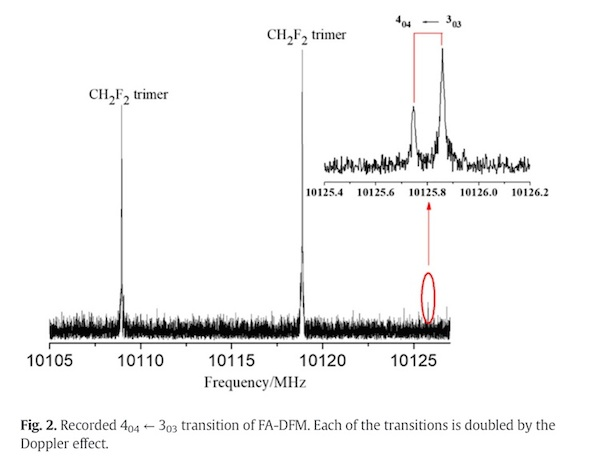
The microwave spectrum gave rotational constants as given in the table
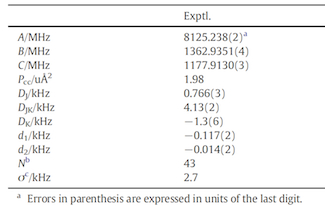

Ab initio computations identified six possible structures given in files: FA-DFM-1.xyz, FA-DFM-2.xyz ... FA-DFM-6.xyz. The coordinates are in $\unicode{x212B}$ngstrom.
Rotational constants A,B,C (in Hz) are inversely related to moments of inertia:
$$B = {h\over{(8 \pi^2 I)}}$$

where h is Plancks constant (kg m$^2$ s$^{-1}$) <br>
I is the moment of inertia (kg m$^2$)<br>
Moments of inertia are defined:

$$
I_x = \sum (M(i)*(Y(i)^2+Z(i)^2))\\
I_y = \sum (M(i)*(X(i)^2+Z(i)^2))\\
I_z= \sum (M(i)*(X(i)^2+Y(i)^2))\\
$$

where M,X,Y and Z are the masses and coordinates of each atom.<br>
(a) Write a function to calculate the moments of inertia of a molecule.<br>
(b) Loop over the files and calculate the moments of inertia of each molecule and the corresponding rotational constants.<br>
(c) Which structure does the spectrum correspond to?

In [ ]:
structures=["FA-DFM-1.xyz", "FA-DFM-2.xyz", "FA-DFM-3.xyz", "FA-DFM-4.xyz", "FA-DFM-5.xyz", "FA-DFM-6.xyz"]

for file in structures:
    print "Structure from ",file
    molecule=np.genfromtxt("PythonPracData/"+file,skip_header=2,dtype=None,encoding=None)
    print molecule


In [13]:
import numpy as np
for i in range (6):
    file="PythonPracData/FA-DFM-"+str(i+1)+".xyz"
    print "Structure from ",file
    molecule=np.genfromtxt(file,skip_header=2,dtype=None)
    print molecule
    

Structure from  PythonPracData/FA-DFM-1.xyz
[('C',  1.699732, -0.296484,  0.   ) ('F',  3.059482, -0.217185,  0.   )
 ('F',  1.203698,  0.977804,  0.   ) ('H',  1.372395, -0.796063, -0.909)
 ('H',  1.372418, -0.796068,  0.909) ('H', -3.54427 , -0.603076,  0.   )
 ('O', -3.173131,  0.292203,  0.   ) ('C', -1.83598 ,  0.151508,  0.   )
 ('O', -1.251824, -0.90644 ,  0.   ) ('H', -1.352033,  1.133388,  0.   )]
Structure from  PythonPracData/FA-DFM-2.xyz
[('C',  1.701352, -0.28904 ,  7.00000e-06)
 ('F',  3.058821, -0.18103 , -5.90000e-05)
 ('F',  1.179896,  0.976758,  3.70000e-05)
 ('H',  1.383378, -0.794513, -9.08873e-01)
 ('H',  1.383467, -0.794519,  9.08914e-01)
 ('O', -3.184579,  0.137603, -7.70000e-05)
 ('C', -1.834127,  0.087997,  4.30000e-05)
 ('O', -1.23012 , -0.950814,  5.10000e-05)
 ('H', -1.347419,  1.075941,  1.27000e-04)
 ('H', -3.45364 ,  1.063481, -5.50000e-05)]
Structure from  PythonPracData/FA-DFM-3.xyz
[('C', -1.701786, -0.251856, -0.43398 )
 ('F', -2.254177, -0.366639,  0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """


In [14]:
def CoM(M,X,Y,Z):
    return np.sum(M*X)/np.sum(M),np.sum(M*Y)/np.sum(M), np.sum(M*Z)/np.sum(M)

In [15]:
def Inertia(M,X,Y,Z):
    Ix=np.sum(M*(Y*Y+Z*Z))
    Iy=np.sum(M*(X*X+Z*Z))
    Iz=np.sum(M*(X*X+Y*Y))
    return Ix,Iy,Iz

In [51]:
def RotCon(Ix,Iy,Iz):
    import numpy as np
    # 1 AMU= 1./6.022e+23 kg^-1
    # I in kg m^2 is I in au (1/6.022e+23)*1e-20
    Ix_SI = (Ix/6.022e+23)*1e-20
    Iy_SI = (Iy/6.022e+23)*1e-20
    Iz_SI = (Iz/6.022e+23)*1e-20
    print Ix_SI,Iy_SI,Iz_SI
    h=6.62607004e-34 # m^2 kg s^-1
    pi=np.pi
    Ix_Hz=h/(8*pi*pi*Ix_SI)
    Iy_Hz=h/(8*pi*pi*Iy_SI)
    Iz_Hz=h/(8*pi*pi*Iz_SI)
    return Ix_Hz/1e3,Iy_Hz/1e3,Iz_Hz/1e3

In [17]:
print RotCon(39.51 , 486.68 , 522.86)

(12790.86783031097, 1038.3972794764247, 966.543984958854)


In [18]:
AMU = {"H": 1.00794, "He": 4.002602, "Li": 6.941, "Be": 9.012182, "B": 10.811, "C": 12.0107, "N": 14.0067, "O": 15.9994, "F": 18.9984032, "Ne": 20.1797}

In [52]:
def Inertialoop(M,X,Y,Z):
    Ix=0.0
    Iy=0.0
    Iz=0.0
#    print X,Y,Z
    for i in range(10):
        print M[i]*(Y[i]**2+Z[i]**2),M[i]*(X[i]**2+Z[i]**2),M[i]*(X[i]**2+Y[i]**2)
        Ix=Ix+M[i]*(Y[i]**2+Z[i]**2)
        Iy=Iy+M[i]*(X[i]**2+Z[i]**2)
        Iz=Iz+M[i]*(X[i]**2+Y[i]**2)
    return Ix,Iy,Iz

In [53]:
dbgmol=np.genfromtxt("PythonPracData/FA-DFM-1.xyz",skip_header=2,dtype=None)
count=0
for line in dbgmol:
    atom[count],x[count],y[count],z[count]=dbgmol[count]
    mass[count]=AMU[atom[count]]
    count += 1
Ix,Iy,Iz=Inertialoop(mass,x,y,z)
print "Moments of inertia is %.2f  %.2f  %.2f in amu A^-2" % (Ix,Iy,Iz)
print "Moments of inertia is %.2f  %.2f  %.2f in MHz" % RotCon(Ix,Iy,Iz)

1.0557737066281392 34.69997971281652 35.75575341944466
0.8961418402980774 177.83322532335902 178.7293671636571
18.164385884366254 27.52657504312007 45.690960927486316
1.4715896785307538 2.731264443371039 2.5371707796217926
1.4715977023933546 2.7313280753277884 2.537242435441143
0.36658844503050136 12.661590920573227 13.028179365603727
1.3660702617880744 161.09412423437013 162.46019449615818
0.2757017037804848 40.48593852619628 40.76164022997676
13.14564259751584 25.072072993619816 38.21771559113566
1.2947678313108397 1.8425074993597268 3.1372753306705663
Moments of inertia is 39.51  486.68  522.86 in amu A^-2
6.560654209837648e-43 8.081677296116132e-42 8.682422778797674e-42
Moments of inertia is 12791.43  1038.40  966.55 in MHz


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [23]:
import numpy as np
atom=np.zeros(10,dtype=str)
mass=np.zeros(10)
x=np.zeros(10)
y=np.zeros(10)
z=np.zeros(10)

for i in range (6):
    filename="PythonPracData/FA-DFM-"+str(i+1)+".xyz"
    print "Structure from ",filename
    molecule=np.genfromtxt(filename,skip_header=2,dtype=None)
    count=0
    for line in molecule:
        atom[count],x[count],y[count],z[count]=molecule[count]
        mass[count]=AMU[atom[count]]
        count += 1
    #print atom
    #print mass
    #print x
    #print y
    #print z
    #print "Centre of mass is (%.2e,%.2e,%.2e)" % CoM(mass,x,y,z)
    Ix,Iy,Iz=Inertia(mass,x,y,z)
    print "Moments of inertia is %.2f  %.2f  %.2f in amu A^-2" % (Ix,Iy,Iz)
    print "Moments of inertia is %.2f  %.2f  %.2f in MHz" % RotCon(Ix,Iy,Iz)

Structure from  PythonPracData/FA-DFM-1.xyz
Moments of inertia is 39.51  486.68  522.86 in amu A^-2
Moments of inertia is 12791.43  1038.40  966.55 in MHz
Structure from  PythonPracData/FA-DFM-2.xyz
Moments of inertia is 39.86  485.22  521.75 in amu A^-2
Moments of inertia is 12679.71  1041.52  968.61 in MHz
Structure from  PythonPracData/FA-DFM-3.xyz
Moments of inertia is 84.32  333.83  370.64 in amu A^-2
Moments of inertia is 5993.30  1513.85  1363.49 in MHz
Structure from  PythonPracData/FA-DFM-4.xyz
Moments of inertia is 61.63  371.24  429.53 in amu A^-2
Moments of inertia is 8200.50  1361.28  1176.57 in MHz
Structure from  PythonPracData/FA-DFM-5.xyz
Moments of inertia is 80.07  355.49  371.07 in amu A^-2
Moments of inertia is 6311.31  1421.59  1361.92 in MHz
Structure from  PythonPracData/FA-DFM-6.xyz
Moments of inertia is 77.86  358.52  374.85 in amu A^-2
Moments of inertia is 6490.50  1409.58  1348.17 in MHz


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # This is added back by InteractiveShellApp.init_path()
